In [1]:
from tqdm import tqdm
import random
import numpy as np
from data_process import get_CIFAR10_data
import math
from scipy.spatial import distance
from models import KNN, Perceptron, SVM, Softmax
from kaggle_submission import output_submission_csv
from scipy.spatial import distance
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
w = np.random.rand(4, 2) 
print (w.transpose())


[[0.09410244 0.20793643 0.58177095 0.91839547]
 [0.81890439 0.80257704 0.75621439 0.59961385]]


# Loading CIFAR-10

In the following cells we determine the number of images for each split and load the images.

In [3]:
# You can change these numbers for experimentation
# For submission we will use the default values 
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 5000

In [4]:
data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

Convert the sets of images from dimensions of **(N, 3, 32, 32) -> (N, 3072)** where N is the number of images so that each **3x32x32** image is represented by a single vector.

In [5]:
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], -1))
print(X_train.shape)
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_test.shape)

(49000, 3, 32, 32)
(49000, 3072)
(5000, 3072)


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [6]:
def get_acc(pred, y_test):
    return np.sum(y_test==pred)/len(y_test)*100

# K-Nearest Neighbors

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and selecting the class that is most common among the k most similar training examples

In this exercise you will implement these steps using writing efficient, vectorized code. Your final implementation should not use for loops to loop over each of the test and train examples. Instead, you should calculate distances between vectorized forms of the datasets. You may refer to the `scipy.spatial.distance.cdist` function to do this efficiently.

The following code :
- Creates an instance of the KNN classifier class with k = 5
- The train function of the KNN class is trained on the training data
- We use the predict function for predicting testing data labels

### Training KNN

In [7]:
#knn = KNN(5)
#knn.train(X_train, y_train)

### Find best k on validation

The value of k is an important hyperparameter for the KNN classifier. We will choose the best k by examining the performance of classifiers trained with different k values on the validation set.

It's not necessary to try many different values of k for the purposes of this exercise. You may increase k by a magnitude of 2 each iteration up to around k=100 or something similar to get a sense of classifier performance for different k values.

**Modify the code below to loop though different values of k, train a KNN classifier for each k, and output the validation accuracy for each of the classifiers. Be sure to note your best k below as well.**

In [8]:
# TO DO : Experiment with different values of k
#k=1
#dist = distance.cdist(X_val, X_train, 'braycurtis' )
#while k< 100:
    #knn = KNN(k)
    #knn.train(X_train, y_train)
    #pred_knn=knn.predict(X_val, dist)
    #print (k)
    #print('The validation accuracy is given by : %f' % (get_acc(pred_knn, y_val)))
    #k=k+2

### Testing KNN

Finally, once you have found the best k according to your experiments on the validation set, retrain a classifier with the best k and test your classifier on the test set.

In [9]:
#best_k = 21
#knn = KNN(best_k)
#knn.train(X_train, y_train)
#dist = knn.find_dist(X_test)

In [10]:
#pred_knn = knn.predict(X_test,dist)
#print('The testing accuracy is given by : %f' % (get_acc(pred_knn, y_test)))

### KNN Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 KNN. Use the following code to do so:

In [11]:
#output_submission_csv('knn_submission.csv', knn.predict(X_test, dist))

# Perceptron

Perceptron has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according the perceptron update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Perceptron classifier in the **models/Perceptron.py**

The following code: 
- Creates an instance of the Perceptron classifier class 
- The train function of the Perceptron class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy


### Train Perceptron

In [12]:
#percept_ = Perceptron(3072)
#K=percept_.train(X_train, y_train,X_test,y_test)
#print(np.argmax(K))
#plt.plot(K)
#plt.ylabel('epoch')
#plt.show()

#pred_percept = percept_.predict(X_train)
#print('The training accuracy is given by : %f' % (get_acc(pred_percept, y_train)))

### Validation

In [13]:
#pred_percept = percept_.predict(X_val)
#print('The validation accuracy is given by : %f' % (get_acc(pred_percept, y_val)))

### Test Perceptron

In [14]:
#pred_percept = percept_.predict(X_test)
#print('The testing accuracy is given by : %f' % (get_acc(pred_percept, y_test)))

### Perceptron Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Perceptron. Use the following code to do so:

In [15]:
#output_submission_csv('perceptron_submission.csv', percept_.predict(X_test))

# Support Vector Machines (with SGD)

Next, you will implement a "soft margin" SVM. In this formulation you will maximize the margin between positive and negative training examples and penalize margin violations using a hinge loss.

We will optimize the SVM loss using SGD. This means you must compute the loss function with respect to model weights. You will use this gradient to update the model weights.

SVM optimized with SGD has 3 hyperparameters that you can experiment with :
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Epochs** - similar to as defined above in Perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case it is a coefficient on the term which maximizes the margin.

You will implement the SVM using SGD in the **models/SVM.py**

The following code: 
- Creates an instance of the SVM classifier class 
- The train function of the SVM class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Train SVM

100%|██████████| 98/98 [00:10<00:00,  9.40it/s]


0


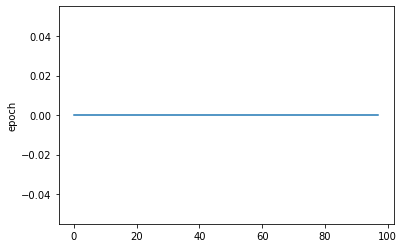

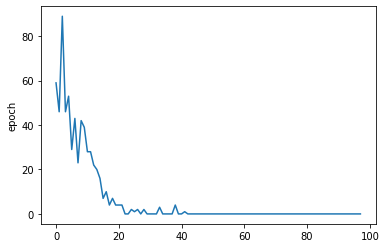

In [16]:
svm = SVM(3072)
K= svm.train(X_train, y_val, X_test,y_val )
H=K[1]
J=K[0]
print(np.argmax(J))
plt.plot(J)
plt.ylabel('epoch')
plt.show()
plt.plot(H)
plt.ylabel('epoch')
plt.show()

In [17]:
pred_svm = svm.predict(X_train)
print('The training accuracy is given by : %f' % (get_acc(pred_svm, y_train)))

The training accuracy is given by : 9.391837


### Validate SVM

In [18]:
pred_svm = svm.predict(X_val)
print('The validation accuracy is given by : %f' % (get_acc(pred_svm, y_val)))

The validation accuracy is given by : 11.200000


### Test SVM


In [19]:
pred_svm = svm.predict(X_test)
print('The testing accuracy is given by : %f' % (get_acc(pred_svm, y_test)))

The testing accuracy is given by : 9.800000


### SVM Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 SVM. Use the following code to do so:

In [20]:
output_submission_csv('svm_submission.csv', svm.predict(X_test))

# Softmax Classifier (with SGD)

Next, you will train a Softmax classifier. This classifier consists of a linear function of the input data followed by a softmax function which outputs a vector of dimension C (number of classes) for each data point. Each entry of the softmax output vector corresponds to a confidence in one of the C classes, and like a probability distribution, the entries of the output vector sum to 1. We use a cross-entropy loss on this sotmax output to train the model. 

Check the following link as an additional resource on softmax classification: http://cs231n.github.io/linear-classify/#softmax

Once again we will train the classifier with SGD. This means you need to compute the gradients of the softmax cross-entropy loss function according to the weights and update the weights using this gradient. Check the following link to help with implementing the gradient updates: https://deepnotes.io/softmax-crossentropy

The softmax classifier has 3 hyperparameters that you can experiment with :
- **Learning rate** - As above, this controls how much the model weights are updated with respect to their gradient.
- **Number of Epochs** - As described for perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case, we minimize the L2 norm of the model weights as regularization, so the regularization constant is a coefficient on the L2 norm in the combined cross-entropy and regularization objective.

You will implement a softmax classifier using SGD in the **models/Softmax.py**

The following code: 
- Creates an instance of the Softmax classifier class 
- The train function of the Softmax class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Train Softmax

In [21]:
#softmax = Softmax(3072)
#K = softmax.train(X_train, y_train, X_test, y_test)
#print(np.argmax(K))
#plt.plot(K)
#plt.ylabel('epoch')
#plt.show()

In [22]:
#pred_softmax = softmax.predict(X_train)
#print('The training accuracy is given by : %f' % (get_acc(pred_softmax, y_train)))

### Validate Softmax

In [23]:
#pred_softmax = softmax.predict(X_val)
#print('The validation accuracy is given by : %f' % (get_acc(pred_softmax, y_val)))

### Testing Softmax

In [24]:
#pred_softmax = softmax.predict(X_test)
#print('The testing accuracy is given by : %f' % (get_acc(pred_softmax, y_test)))

### Softmax Kaggle Submission

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 1 Softmax. Use the following code to do so:

In [25]:
#output_submission_csv('softmax_submission.csv', softmax.predict(X_test))